### Word Frequency - TF_IDF  



### Importing libraries
Python imports:

In [1]:
import spacy
import string
import re
import itertools
import csv
import shutil
import matplotlib.pyplot as plt
import zipfile
import lzma
import json
import requests
import os
import xml.etree.cElementTree as ET
import pandas as pd
import numpy as np
import seaborn as sns
import random
from nltk.corpus import stopwords 

#!pip install -U spacy unidecode

from unidecode import unidecode
#from spacy.matcher import Matcher 
#from spacy import displacy 
from IPython.display import Image, display
import nltk
#nltk.download('wordnet')
#nltk.download('words')
#nltk.download('punkt')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import skipgrams
from nltk.corpus import wordnet as wn
#from spacy.lang.en import English

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from tqdm import tqdm
from ipywidgets import FloatProgress
%matplotlib inline


#!pip install pyquery
#!pip install -U gensim

import gensim
#import pyLDAvis.gensim
import pickle
from gensim import corpora
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import strip_non_alphanum
from gensim.models import CoherenceModel

#!pip install -U textblob
from textblob import TextBlob

In [2]:
#!pip install yellowbrick

import matplotlib
import yellowbrick

from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer

### Frequency 

In [5]:
#Load data
with open("weapons.pkl", 'rb') as f:
     weapons = pickle.load(f)

In [6]:
weapons

,Text,crimes
9,guilty degree murder burglary proven guilty re...,weapons
14,robbery assault guilty armed robbery murder co...,weapons
15,following guilty degree murder conviction foll...,weapons
16,reconsideration sentence offense raised imposi...,weapons
17,following guilty degree murder sexual assault ...,weapons
...,...,...
186353,conviction degree murder prison sentence rever...,weapons
186362,dismissal conviction conviction evidentiary ag...,weapons
186363,forensic evidence raise reasonable probability...,weapons
186365,armed robbery murder tried separately followin...,weapons


In [7]:
#Load data
with open("drug.pkl", 'rb') as f:
     drug = pickle.load(f)

In [8]:
from tqdm.notebook import tqdm
tqdm.pandas()

### Weapons Frequency

In [9]:
vectorizer = CountVectorizer()
vector_weapons = vectorizer.fit_transform(weapons['Text'])

words_list = vectorizer.get_feature_names_out()
count_list = vector_weapons.toarray().sum(axis=0)

w = dict(zip(words_list, count_list))
w = {k: v for k, v in sorted(w.items(), key=lambda item: item[1], reverse=True)}

weapons_freq = pd.DataFrame.from_dict(w, orient='index').reset_index()
weapons_freq.columns = ["words_tot", "abs_freq"]

weapons_freq["rel_freq"] = weapons_freq.progress_apply(lambda x: np.round(x.abs_freq / weapons_freq.abs_freq.sum(), 3), axis=1)

weapons_freq[:20]

  0%|          | 0/22075 [00:00<?, ?it/s]

,words_tot,abs_freq,rel_freq
0,evidence,173821,0.031
1,testimony,89375,0.016
2,stated,61750,0.011
3,murder,54126,0.010
4,statement,45597,0.008
5,reasonable,43609,0.008
6,guilty,42999,0.008
7,offense,41520,0.008
8,conviction,39746,0.007
9,sentence,37855,0.007


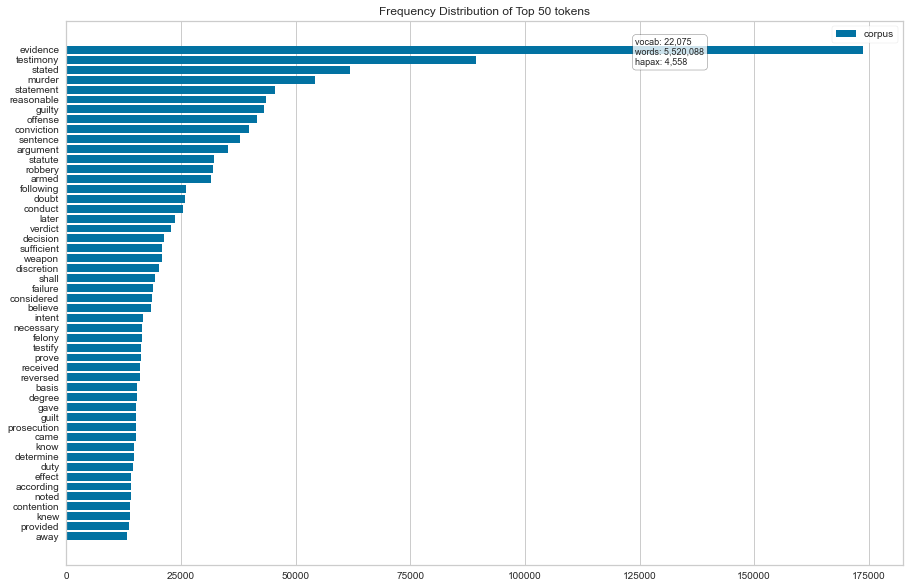

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [10]:
visualizer = FreqDistVisualizer(features=words_list, size=(1080, 720))
visualizer.fit(vector_weapons)
visualizer.poof()

### Drug Frequency

In [11]:
vectorizer = CountVectorizer()
vector_drug = vectorizer.fit_transform(drug['Text'])

words_list = vectorizer.get_feature_names()
count_list = vector_drug.toarray().sum(axis=0)

w = dict(zip(words_list, count_list))
w = {k: v for k, v in sorted(w.items(), key=lambda item: item[1], reverse=True)}

drug_freq = pd.DataFrame.from_dict(w, orient='index').reset_index()
drug_freq.columns = ["words_tot", "abs_freq"]

drug_freq["rel_freq"] = drug_freq.progress_apply(lambda x: np.round(x.abs_freq / drug_freq.abs_freq.sum(), 3), axis=1)

drug_freq[:20]

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


  0%|          | 0/20752 [00:00<?, ?it/s]

,words_tot,abs_freq,rel_freq
0,evidence,85026,0.028
1,testimony,37036,0.012
2,stated,31126,0.010
3,statute,22326,0.007
4,reasonable,20416,0.007
5,shall,19072,0.006
6,guilty,18881,0.006
7,argument,15448,0.005
8,decision,15389,0.005
9,offense,14803,0.005


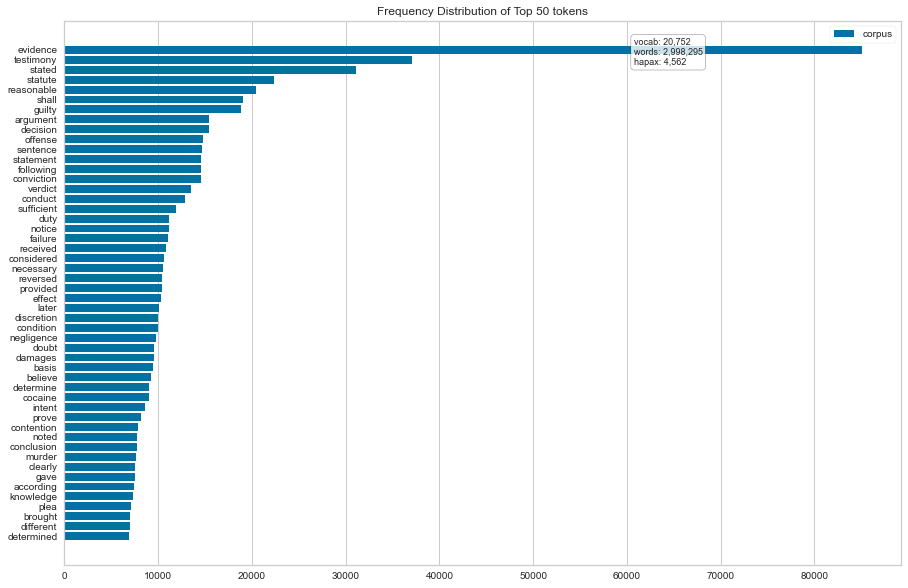

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [12]:
visualizer = FreqDistVisualizer(features=words_list, size=(1080, 720))
visualizer.fit(vector_drug)
visualizer.poof()

### Drug TF_IDF

In [23]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(drug['Text'])

In [24]:
drug_tfidf = pd.DataFrame(zip(vectorizer.get_feature_names_out().tolist(),vectors.toarray()[0].tolist()), columns=["word", "value"]).sort_values("value", ascending=False).reset_index(drop=True)

In [25]:
drug_tfidf[:20]

,word,value
0,jeopardy,0.411243
1,conspirator,0.351189
2,conspiracy,0.240684
3,hearsay,0.232852
4,conviction,0.192826
5,cocaine,0.188539
6,offense,0.181024
7,sentence,0.169800
8,evidence,0.150818
9,resentence,0.142426


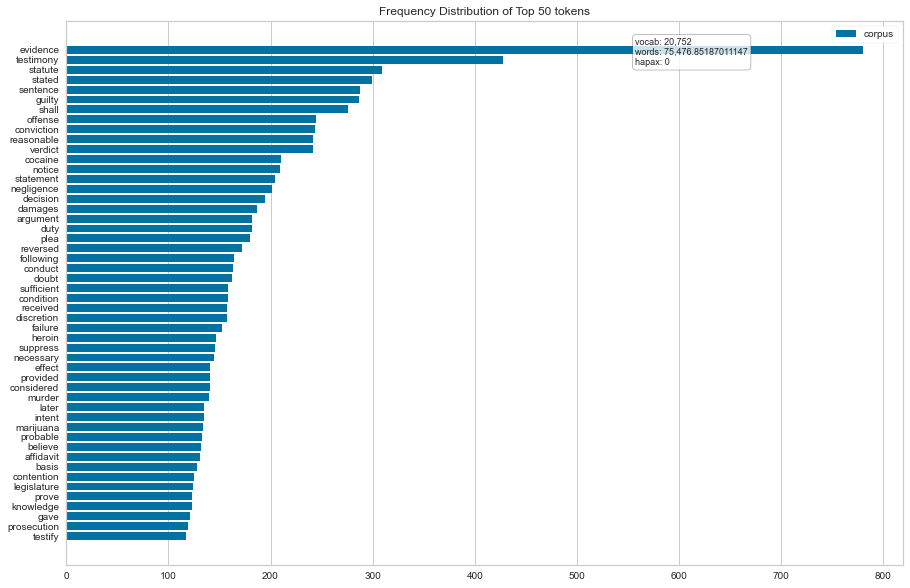

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [26]:
visualizer = FreqDistVisualizer(features=vectorizer.get_feature_names_out(), size=(1080, 720))
visualizer.fit(vectors)
visualizer.poof()

In [27]:
drug_tfidf[:20]

,word,value
0,jeopardy,0.411243
1,conspirator,0.351189
2,conspiracy,0.240684
3,hearsay,0.232852
4,conviction,0.192826
5,cocaine,0.188539
6,offense,0.181024
7,sentence,0.169800
8,evidence,0.150818
9,resentence,0.142426


### Weapons TF_IDF

In [28]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(weapons['Text'])
vectors = vectorizer.transform(weapons['Text'])

In [29]:
weapons_tfidf = pd.DataFrame(zip(vectorizer.get_feature_names_out().tolist(),vectors.toarray()[0].tolist()), columns=["word", "value"]).sort_values("value", ascending=False).reset_index(drop=True)

In [30]:
weapons_tfidf[:20]

,word,value
0,handgun,0.343278
1,dissolution,0.257742
2,divorce,0.246191
3,phone,0.235929
4,inference,0.197609
5,homicide,0.197571
6,circumstantial,0.187832
7,donor,0.187614
8,evidence,0.187396
9,reasonable,0.179446


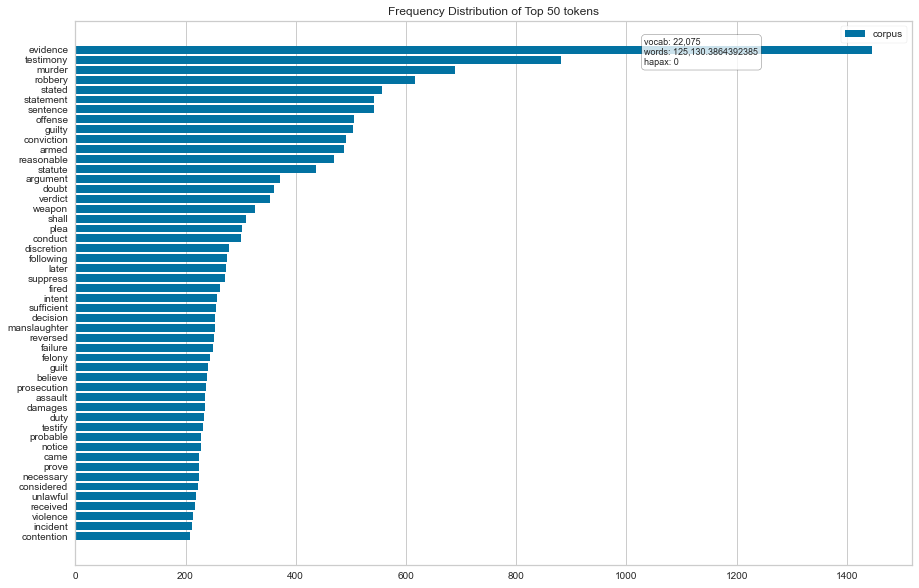

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [31]:
visualizer = FreqDistVisualizer(features=vectorizer.get_feature_names_out(), size=(1080, 720))
visualizer.fit(vectors)
visualizer.poof()